In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('data/u.data', sep= '\t', names= column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
movie_titles = pd.read_csv("data/Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


We can merge them together:

In [5]:
df = pd.merge(df, movie_titles, on= 'item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


### Exploratory Data Analysis

Create a ratings dataframe with average rating and number of ratings

In [6]:
df.groupby('title')['rating'].mean().sort_values(ascending= False).to_frame().head()

,rating
title,
Marlene Dietrich: Shadow and Light (1996),5.0
Prefontaine (1997),5.0
Santa with Muscles (1996),5.0
Star Kid (1997),5.0
Someone Else's America (1995),5.0


In [7]:
df.groupby('title')['rating'].count().sort_values(ascending= False).to_frame().head()

,rating
title,
Star Wars (1977),584
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485


In [8]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [9]:
ratings['number_of_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


### Data Visualization

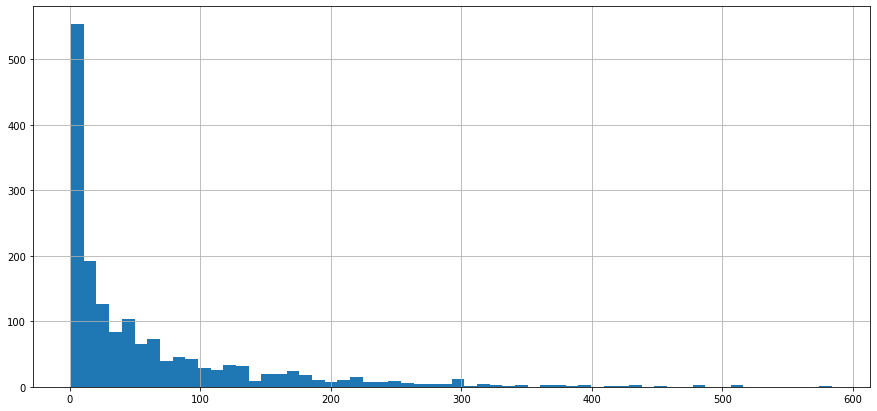

In [10]:
plt.figure(figsize= (15, 7))
ratings['number_of_ratings'].hist(bins= 60)

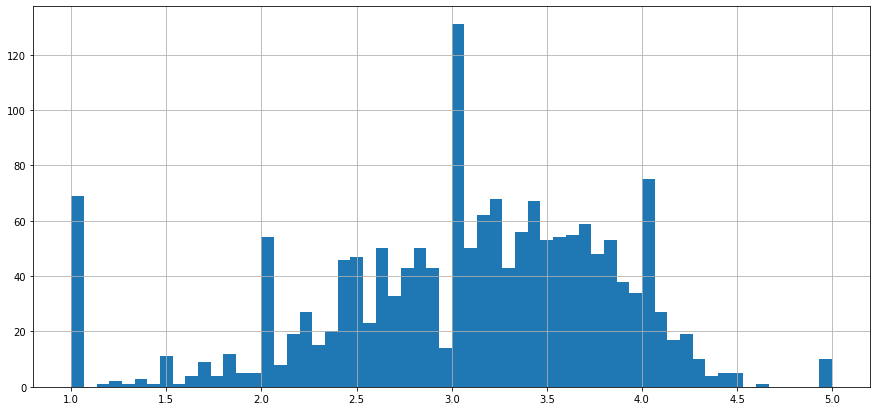

In [11]:
plt.figure(figsize= (15, 7))
ratings['rating'].hist(bins= 60)

Here, we can see that the feature follows a normal distribution.

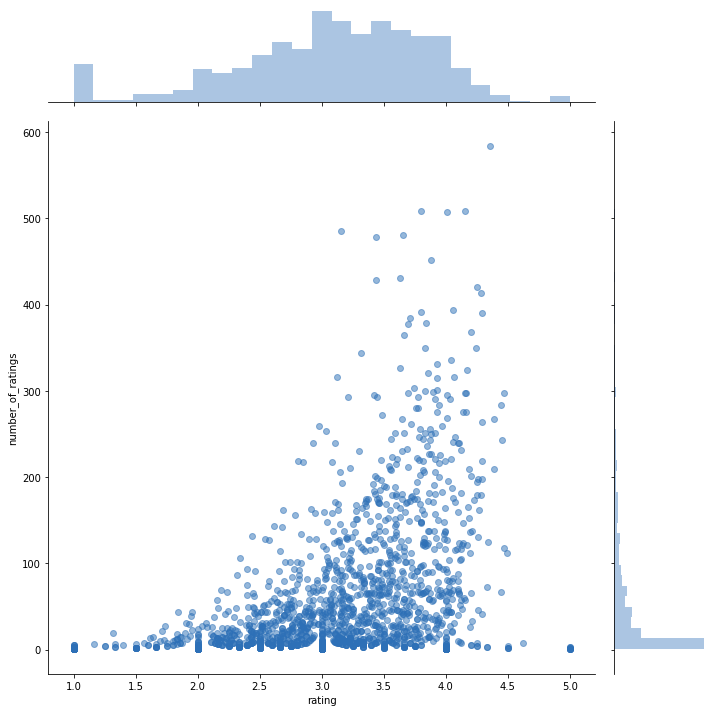

In [12]:
sns.jointplot(x= 'rating', y= 'number_of_ratings', data= ratings, alpha= 0.5, height= 10, color= '#2d70b7')

### Recommending Movies

In [13]:
movie = df.pivot_table(index= 'user_id', columns= 'title', values= 'rating').fillna(0)
movie.head()

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
0                              0.0           0.0                    0.0   
1                              0.0           0.0                    2.0   
2                              0.0           0.0                    0.0   
3                              0.0           0.0                    0.0   
4                              0.0           0.0                    0.0   

title    12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                 
0                        0.0         0.0                          0.0   
1                        5.0         0.0                          0.0   
2                        0.0         0.0                          0.0   
3                        0.0         2.0                          0.0   
4                        0.0         0.0                          0.0   

title    20,000 Leagues Under the Sea (1954)  2001: A Space Odyssey (1968)  \
user_id                                                                      
0                                        0.0                           0.0   
1                                        3.0                           4.0   
2                                        0.0                           0.0   
3                                        0.0                           0.0   
4                                        0.0                           0.0   

title    3 Ninjas: High Noon At Mega Mountain (1998)  39 Steps, The (1935)  \
user_id                                                                      
0                                                0.0                   0.0   
1                                                0.0                   0.0   
2                                                1.0                   0.0   
3                                                0.0                   0.0   
4                                                0.0                   0.0   

title    8 1/2 (1963)  8 Heads in a Duffel Bag (1997)  8 Seconds (1994)  \
user_id                                                                   
0                 0.0                             0.0               0.0   
1                 0.0                             0.0               0.0   
2                 0.0                             0.0               0.0   
3                 0.0                             0.0               0.0   
4                 0.0                             0.0               0.0   

title    A Chef in Love (1996)  Above the Rim (1994)  Absolute Power (1997)  \
user_id                                                                       
0                          0.0                   0.0                    0.0   
1                          0.0                   0.0                    0.0   
2                          0.0                   0.0                    3.0   
3                          0.0                   0.0                    0.0   
4                          0.0                   0.0                    0.0   

title    Abyss, The (1989)  Ace Ventura: Pet Detective (1994)  \
user_id                                                         
0                      0.0                                0.0   
1                      3.0                                3.0   
2                      0.0                                0.0   
3                      0.0                                0.0   
4                      0.0                                0.0   

title    Ace Ventura: When Nature Calls (1995)  Across the Sea of Time (1995)  \
user_id                                                                         
0                                          0.0                            0.0   
1                                          0.0                            0.0   
2       

In [14]:
# Dimensions of the dataframe
movie.shape

(944, 1664)

### Most rated movie

In [15]:
ratings.sort_values('number_of_ratings', ascending= False).head(15)

,rating,number_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Now let's consider two movies: __Star Wars(1997)__ and __Toy Story(1995)__:

In [16]:
starwars_user_ratings = movie['Star Wars (1977)']
toystory_user_ratings = movie['Toy Story (1995)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    0.0
4    5.0
Name: Star Wars (1977), dtype: float64

Using __corrwith()__ method to get correlations between two pandas series:

In [17]:
same_as_starwars = movie.corrwith(starwars_user_ratings)
same_as_toystory = movie.corrwith(toystory_user_ratings)

In [18]:
corr_starwars = pd.DataFrame(same_as_starwars, columns= ['Correlation'])
corr_starwars.dropna(inplace= True) # dropping null values
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),-0.009011
1-900 (1994),-0.009067
101 Dalmatians (1996),0.155314
12 Angry Men (1957),0.212583
187 (1997),-0.034787


In [19]:
corr_starwars.sort_values('Correlation', ascending= False).head(15)

,Correlation
title,
Star Wars (1977),1.000000
Return of the Jedi (1983),0.746797
"Empire Strikes Back, The (1980)",0.555233
Raiders of the Lost Ark (1981),0.540455
Indiana Jones and the Last Crusade (1989),0.467523
Toy Story (1995),0.456219
"Terminator, The (1984)",0.437866
Back to the Future (1985),0.419493
Alien (1979),0.412516


We can see here that similar movies to that of __Star Wars (1997)__, however we get some results that are absurd. This happens because most of the movies are watched by the users only once who have watched __Star Wars (1997)__

Let's fix this by filtering out the movies that have less than 100 reviews

In [20]:
corr_starwars = corr_starwars.join(ratings['number_of_ratings'])
corr_starwars.head()

,Correlation,number_of_ratings
title,,
'Til There Was You (1997),-0.009011,9
1-900 (1994),-0.009067,5
101 Dalmatians (1996),0.155314,109
12 Angry Men (1957),0.212583,125
187 (1997),-0.034787,41


Now we sort the values:

In [21]:
corr_starwars[corr_starwars['number_of_ratings'] > 100].sort_values('Correlation', ascending= False).head()

,Correlation,number_of_ratings
title,,
Star Wars (1977),1.000000,584
Return of the Jedi (1983),0.746797,507
"Empire Strikes Back, The (1980)",0.555233,368
Raiders of the Lost Ark (1981),0.540455,420
Indiana Jones and the Last Crusade (1989),0.467523,331


Now, we can do same for __Toy Story (1995)__

In [22]:
corr_toystory = pd.DataFrame(same_as_toystory, columns= ['Correlation'])
corr_toystory.dropna(inplace= True) # dropping null values
corr_toystory = corr_toystory.join(ratings['number_of_ratings'])
corr_toystory[corr_toystory['number_of_ratings'] > 100].sort_values('Correlation', ascending= False).head()

,Correlation,number_of_ratings
title,,
Toy Story (1995),1.000000,452
Star Wars (1977),0.456219,584
Independence Day (ID4) (1996),0.454983,429
"Rock, The (1996)",0.432208,378
Willy Wonka and the Chocolate Factory (1971),0.424341,326


Now, lets take an another movie: __Return of the Jedi (1983)__

In [23]:
returnoftheJedi_user_ratings = movie['Return of the Jedi (1983)']
same_as_returnoftheJedi = movie.corrwith(returnoftheJedi_user_ratings)
corr_returnoftheJedi = pd.DataFrame(same_as_returnoftheJedi, columns= ['Correlation'])
corr_returnoftheJedi.dropna(inplace= True) # dropping NULL values
corr_returnoftheJedi = corr_returnoftheJedi.join(ratings['number_of_ratings'])
corr_returnoftheJedi[corr_returnoftheJedi['number_of_ratings'] > 100].sort_values('Correlation', ascending= False).head(10)

,Correlation,number_of_ratings
title,,
Return of the Jedi (1983),1.000000,507
Star Wars (1977),0.746797,584
"Empire Strikes Back, The (1980)",0.548797,368
Raiders of the Lost Ark (1981),0.503323,420
Indiana Jones and the Last Crusade (1989),0.478037,331
Independence Day (ID4) (1996),0.455964,429
Star Trek: First Contact (1996),0.449233,365
Jurassic Park (1993),0.431135,261
"Hunt for Red October, The (1990)",0.428795,227
